In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df= pd.read_csv("1920_train.csv",encoding='windows-1254')

In [4]:
df2=df
df.head()

Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1   9:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2   7:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3   2:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4   3:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36815 non-null  float64
 11  maxUE_UL     36815 non-null  float64
 12  maxUE_UL+DL  36899 non-null  object 
 13  Unusual      36904 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.9+ MB


In [6]:
df.describe()

PRBUsageUL    PRBUsageDL    meanThr_DL    meanThr_UL     maxThr_DL  \
count  36904.000000  36904.000000  36904.000000  36904.000000  36904.000000   
mean       7.835090      2.106396      0.560525      0.067610     17.764369   
std        8.428206      2.247514      0.727623      0.186555     15.739932   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.213000      0.707000      0.140000      0.021000      5.710750   
50%        4.547000      1.314000      0.352000      0.040000     14.170000   
75%       12.126000      2.728000      0.718000      0.075000     25.059500   
max       51.333000     77.505000     19.601000     12.461000    140.008000   

          maxThr_UL     meanUE_DL     meanUE_UL      maxUE_DL      maxUE_UL  \
count  36904.000000  36904.000000  36904.000000  36815.000000  36815.000000   
mean       1.791974      1.173441      0.665143      4.190819      3.063371   
std        5.028928      0.214065      0.535493      1.772484      1.387446   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.362000      1.041000      0.010000      3.000000      2.000000   
50%        0.703000      1.112000      1.011000      4.000000      3.000000   
75%        1.242000      1.263000      1.051000      5.000000      4.000000   
max       48.253000      2.915000      2.668000     12.000000     12.000000   

            Unusual  
count  36904.000000  
mean       0.275932  
std        0.446989  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [7]:
df.drop('CellName',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)

In [8]:
df.head()

PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  maxThr_UL  \
0      11.642       1.393       0.370       0.041     15.655      0.644   
1      21.791       1.891       0.537       0.268     10.273      1.154   
2       0.498       0.398       0.015       0.010      0.262      0.164   
3       1.891       1.095       0.940       0.024     60.715      0.825   
4       0.303       0.404       0.016       0.013      0.348      0.168   

   meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      1.114      1.025       4.0       3.0           7        1  
1      1.353      1.085       6.0       4.0          10        1  
2      0.995      0.995       1.0       1.0           2        1  
3      1.035      0.995       2.0       2.0           4        1  
4      1.011      1.011       2.0       1.0           3        0

In [9]:
df.isnull().sum()

PRBUsageUL      0
PRBUsageDL      0
meanThr_DL      0
meanThr_UL      0
maxThr_DL       0
maxThr_UL       0
meanUE_DL       0
meanUE_UL       0
maxUE_DL       89
maxUE_UL       89
maxUE_UL+DL     5
Unusual         0
dtype: int64

In [10]:
from pandas_profiling import ProfileReport

In [11]:
pp_report=ProfileReport(df)

In [12]:
pp_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

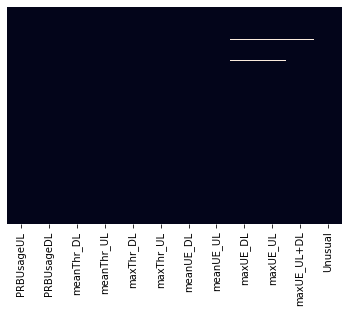

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  #check nan values  using heatmap

In [14]:
df.dropna(inplace=True)

<AxesSubplot:>

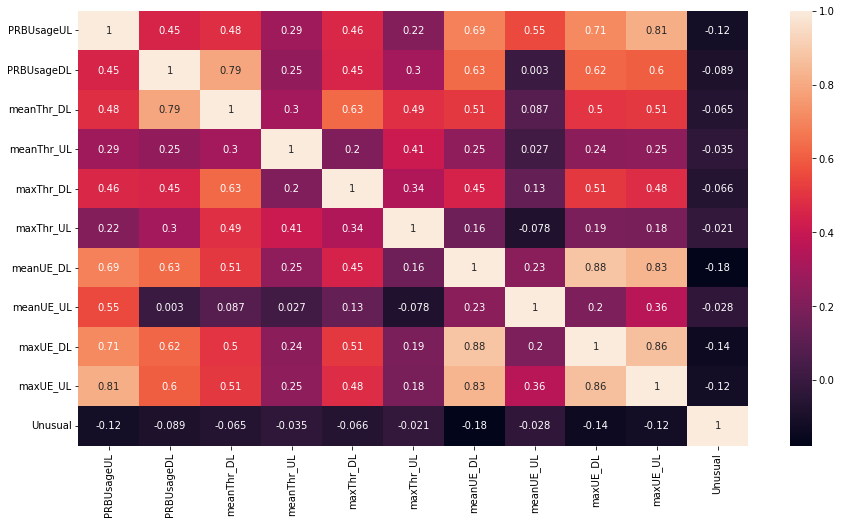

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop('Unusual',axis=1)
y=df['Unusual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel=LogisticRegression()

In [20]:
logmodel.fit(X_train,y_train)

C:\Users\VIKAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
lr_predict=logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
lr_conf=confusion_matrix(y_test,lr_predict)
lr_conf

array([[5339,   37],
       [1979,    8]], dtype=int64)

<AxesSubplot:>

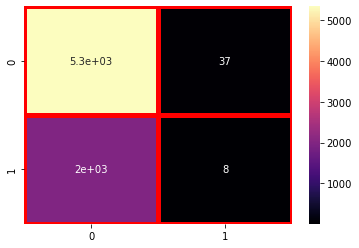

In [24]:
sns.heatmap(lr_conf, annot=True,linecolor='red',linewidths=5,cmap='magma')

In [25]:
model=[]

In [26]:
model.append(accuracy_score(y_test,lr_predict))
print(accuracy_score(y_test,lr_predict))

0.7261985603694147


In [27]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      5376
           1       0.18      0.00      0.01      1987

    accuracy                           0.73      7363
   macro avg       0.45      0.50      0.42      7363
weighted avg       0.58      0.73      0.62      7363



# Precision Recall Curve

0.7464699036953637

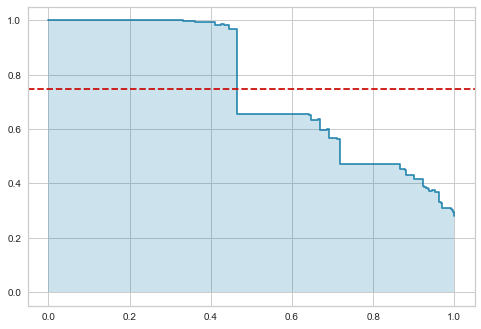

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
gb_clf_pr = PrecisionRecallCurve(GradientBoostingClassifier(n_estimators=20))
gb_clf_pr.fit(X_train,y_train)
gb_clf_pr.score(X_test,y_test)


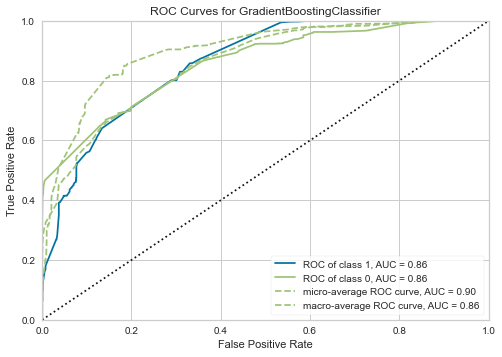

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=array([1, 0], dtype=int64),
       estimator=GradientBoostingClassifier(n_estimators=20))

In [29]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc

model=GradientBoostingClassifier(n_estimators=20)
roc_auc(model,X_train,y_train, X_test=X_test,y_test=y_test,classes=y_train.unique())

# Using K Nearest Neighbours

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()

In [32]:
scaler.fit(df.drop('Unusual',axis=1))

StandardScaler()

In [33]:
scaled_features = scaler.transform(df.drop('Unusual',axis=1))

In [34]:
df_feat=pd.DataFrame(scaled_features,columns =df.columns[:-1])

In [35]:
df_feat.head()

PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  maxThr_UL  \
0    0.452408   -0.316906   -0.261315   -0.142494  -0.133480  -0.228198   
1    1.657450   -0.095313   -0.031824    1.076994  -0.475360  -0.126801   
2   -0.870775   -0.759646   -0.749154   -0.309031  -1.111287  -0.323631   
3   -0.705377   -0.449505    0.521976   -0.233821   2.728857  -0.192212   
4   -0.893928   -0.756976   -0.747780   -0.292915  -1.105824  -0.322836   

   meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  maxUE_UL+DL  
0  -0.301750   0.669459 -0.107658 -0.045675    -0.083269  
1   0.856259   0.781581  1.020718  0.675084     0.899486  
2  -0.878332   0.613398 -1.800221 -1.487193    -1.721194  
3  -0.684523   0.613398 -1.236033 -0.766434    -1.066024  
4  -0.800808   0.643298 -1.236033 -1.487193    -1.393609

In [36]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(scaled_features, df['Unusual'], test_size=0.2, random_state=101)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_k,y_train_k)
    predic_k=knn.predict(X_test_k)
    error_rate.append(np.mean(predic_k != y_test_k))

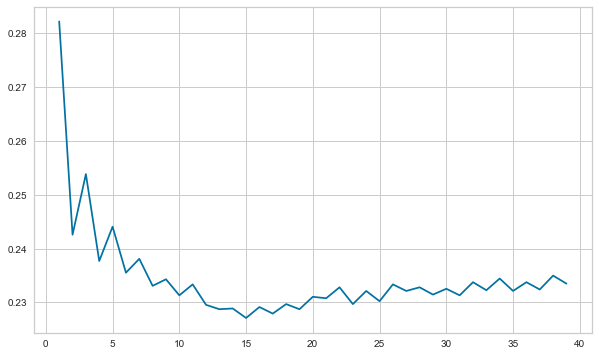

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [40]:
knn_k=KNeighborsClassifier(n_neighbors=15)

In [41]:
knn_k.fit(X_train_k,y_train_k)

KNeighborsClassifier(n_neighbors=15)

In [42]:
predict_knn=knn_k.predict(X_test_k)

In [43]:
model.append(accuracy_score(y_test_k,predict_knn))
print(accuracy_score(y_test_k,predict_knn))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'append'

In [46]:
knn_conf=confusion_matrix(y_test_k,predict_knn)
knn_conf

array([[5106,  270],
       [1402,  585]], dtype=int64)

<AxesSubplot:>

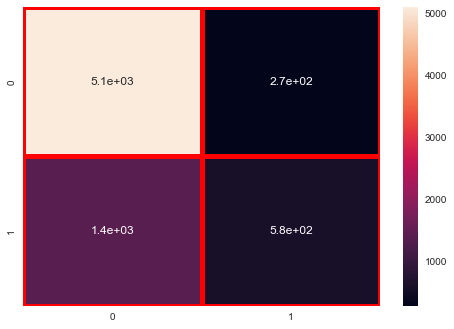

In [47]:
sns.heatmap(knn_conf, annot=True,linecolor='red',linewidths=5)

In [48]:
print(classification_report(y_test_k,predict_knn))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      5376
           1       0.68      0.29      0.41      1987

    accuracy                           0.77      7363
   macro avg       0.73      0.62      0.64      7363
weighted avg       0.76      0.77      0.74      7363



# Random Forest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=100)

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
rfc_predic=rfc.predict(X_test)

In [53]:
model.append(accuracy_score(y_test,rfc_predic))
print(accuracy_score(y_test,rfc_predic))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'append'

In [54]:
rfc_conf=confusion_matrix(y_test,rfc_predic)
rfc_conf

array([[5352,   24],
       [ 422, 1565]], dtype=int64)

<AxesSubplot:>

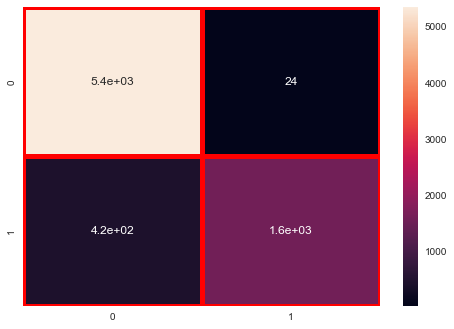

In [55]:
sns.heatmap(rfc_conf, annot=True,linecolor='red',linewidths=5)

In [56]:
print(classification_report(y_test,rfc_predic))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5376
           1       0.98      0.79      0.88      1987

    accuracy                           0.94      7363
   macro avg       0.96      0.89      0.92      7363
weighted avg       0.94      0.94      0.94      7363



In [57]:
from sklearn import tree

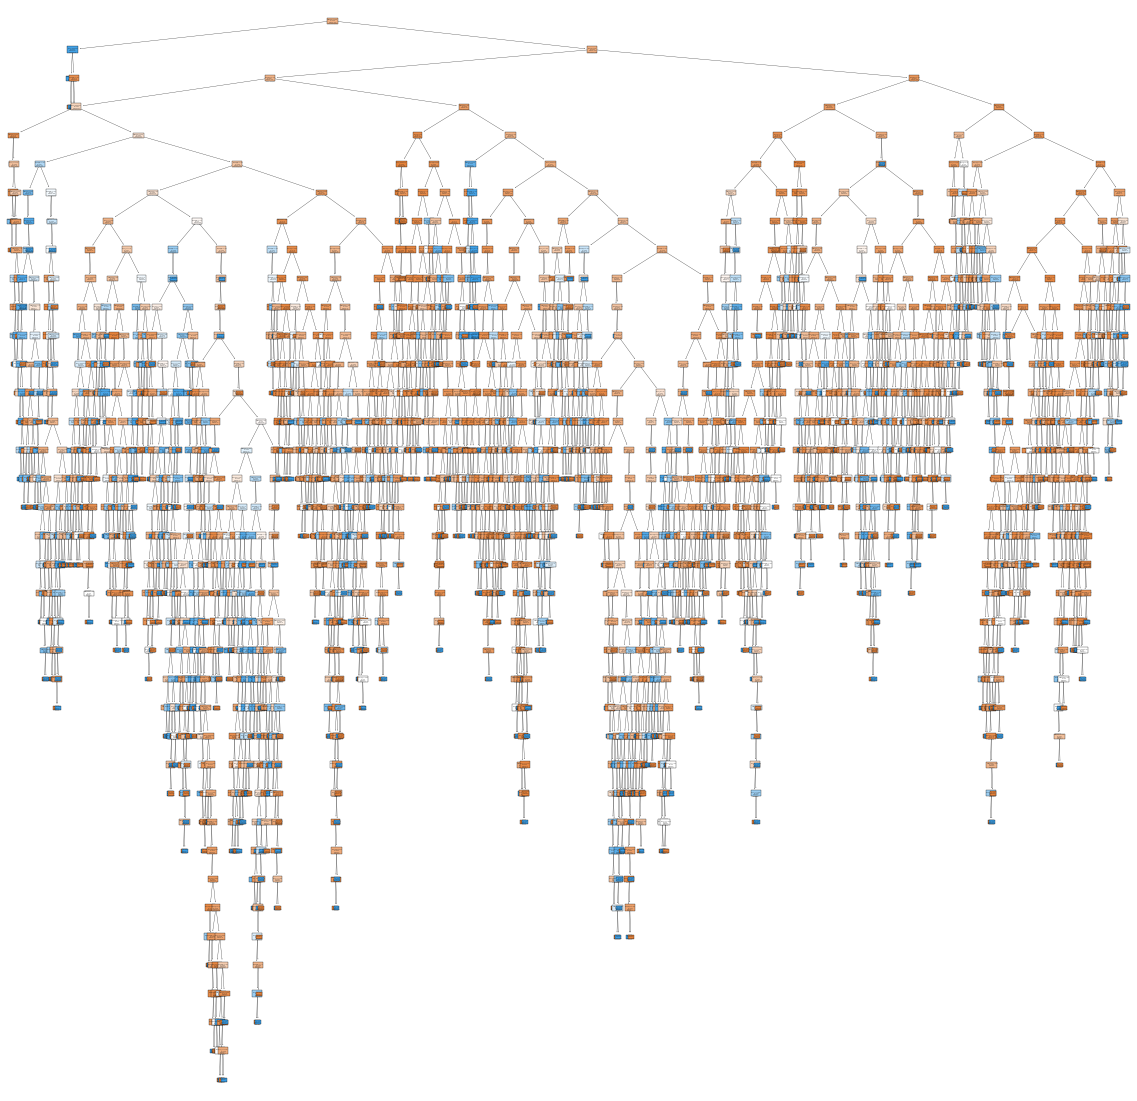

In [58]:
fn=df.drop('Unusual',axis=1)
cn=df['Unusual']
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)

# Support Vector Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
svvc=SVC(C=100,gamma=0.002)

In [61]:
svvc.fit(X_train,y_train)

SVC(C=100, gamma=0.002)

In [62]:
predi_svvc=svvc.predict(X_test)

In [63]:
model.append(accuracy_score(y_test,predi_svvc))
print(accuracy_score(y_test,predi_svvc))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'append'

In [64]:
svc_conf=confusion_matrix(y_test,predi_svvc)
svc_conf

array([[5369,    7],
       [1982,    5]], dtype=int64)

<AxesSubplot:>

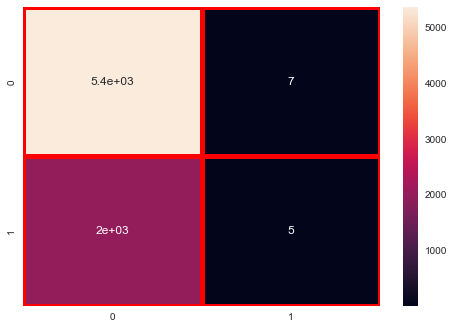

In [65]:
sns.heatmap(svc_conf, annot=True,linecolor='red',linewidths=5)

In [66]:
print(classification_report(y_test,predi_svvc))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      5376
           1       0.42      0.00      0.01      1987

    accuracy                           0.73      7363
   macro avg       0.57      0.50      0.42      7363
weighted avg       0.65      0.73      0.62      7363



In [67]:
Dff = pd.DataFrame(model)

In [68]:
Dff['Algo'] = ['LR','Knn','RF','SVM']
Dff.rename(columns = {0:'Accuracy'}, inplace = True)

ValueError: Length of values (4) does not match length of index (20)

In [70]:
Dff.rename(columns = {0:'Accuracy'}, inplace = True)

In [69]:
sns.barplot(x='Algo',y='Accuracy',data=Dff)

ValueError: Could not interpret input 'Algo'